<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-первичный-осмотр" data-toc-modified-id="Загрузка-данных-и-первичный-осмотр-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и первичный осмотр</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Загрузка-данных.-Осмотр-и-обработка.-Первичный-анализ" data-toc-modified-id="Загрузка-данных.-Осмотр-и-обработка.-Первичный-анализ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных. Осмотр и обработка. Первичный анализ</a></span></li><li><span><a href="#Работа-с-аномалиями.-Заключительная-преподготовка" data-toc-modified-id="Работа-с-аномалиями.-Заключительная-преподготовка-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Работа с аномалиями. Заключительная преподготовка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Ансамбль-SVR-и-LinearRegression" data-toc-modified-id="Ансамбль-SVR-и-LinearRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ансамбль SVR и LinearRegression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>ElasticNet</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Light-GBM-с-новыми-признаками" data-toc-modified-id="Light-GBM-с-новыми-признаками-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Light GBM с новыми признаками</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<footer id="footer"></footer>

# Определение стоимости автомобилей

![](https://i.ibb.co/vZrLqM2/kp108-ocenka-avto-s-probegom.jpg)

Сервис по продаже автомобилей с пробегом **«Не бит, не крашен»** разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

## Загрузка данных и первичный осмотр

### Импорт необходимых библиотек

In [1]:
!pip install Catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression, ElasticNet
import time
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(42)

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

In [3]:
!gdown --id 1RGZmVXLyqW8g4O4J0rt2sDsQ8Yllwh5D

Downloading...
From: https://drive.google.com/uc?id=1RGZmVXLyqW8g4O4J0rt2sDsQ8Yllwh5D
To: /content/autos.csv
44.4MB [00:00, 94.5MB/s]


### Загрузка данных. Осмотр и обработка. Первичный анализ

In [4]:
df = pd.read_csv('/content/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Для удобства приведем названия признаков к нижнему регистру и применим snake case

In [5]:
df.columns = df.columns.str.lower()
df.columns = [ 'date_crawled' , 'price' , 'vehicle_type' , 'registration_year' , 'gearbox' ,
               'power' , 'model' , 'kilometer' , 'registration_month' , 'fuel_type' , 'brand' ,
               'not_repaired' , 'date_created' , 'number_of_pictures' , 'postal_code' ,
               'last_seen' ]

Посмотрим на типы данных и проверим пропуски

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

Наблюдаются пропуски в 5 признаках - `not_repaired`, `vehicle_type`, `fuel_type`, `gearbox`, `model`. Посмотрим их количество:

In [7]:
df.isna().mean().sort_values(ascending=False)

not_repaired          0.200791
vehicle_type          0.105794
fuel_type             0.092827
gearbox               0.055967
model                 0.055606
last_seen             0.000000
postal_code           0.000000
number_of_pictures    0.000000
date_created          0.000000
brand                 0.000000
registration_month    0.000000
kilometer             0.000000
power                 0.000000
registration_year     0.000000
price                 0.000000
date_crawled          0.000000
dtype: float64

Значительные пропуски наблюдаются в признаке `not_repaired` - это может быть связано как с тем, что пользователь не сообщил о факте отсутствия ремонта, либо автомобиль подвергался ремонту, данные отсутствуют в зависимости от неизвестных факторов. Вероятность пропуска могла бы быть описана на основе других атрибутов, но информация по этим атрибутам в наборе данных отсутствует, аналогично `vehicle_type`  

`fuel_type`, `gearbox`, `model` - достаточно важные признаки, наблюдается 5-9% пропусков - тип топлива, коробка передач и модель автомобиля влияют на конечную цену. Могли появится по причине пропуска данных характеристик при заполнении объявления пользователем - умышленно либо по причине неосведомленности

Нам дали информацию о 354369 объявлениях. Но удалять пропуски не будем - заменим на `unknown` - неизвестно. Тип данных этих столбцов object - нам не помешает в анализе подобная замена

<a id=nan></a>

In [8]:
nan_cols = ['not_repaired', 'vehicle_type', 'fuel_type', 'gearbox', 'model']
df[nan_cols] = df[nan_cols].fillna('unknown')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
registration_year,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
registration_month,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
number_of_pictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
postal_code,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


In [10]:
df['vehicle_type'].value_counts().to_frame('qnty')

,qnty
sedan,91457
small,79831
wagon,65166
unknown,37490
bus,28775
convertible,20203
coupe,16163
suv,11996
other,3288


Наблюдаются аномалии в признаки registration_year - min значится как 1000.0, аналогично для признака power аномальное значения мощности (максимальной) - 20 000 л.с. - это допустимо для мощных грузовых автомобилей, но данные значения сильно выбиваются из общей массы - большая часть сета - легковые автомобили  

Будем смотреть выбросы и постараемся очистить сет от них


Признаки  


- `date_crawled` — дата скачивания анкеты из базы
- `vehicle_type` — тип автомобильного кузова
- `registration_year` — год регистрации автомобиля
- `gearbox` — тип коробки передач
- `power` — мощность (л. с.)
- `model` — модель автомобиля
- `kilometer` — пробег (км)
- `registration_month` — месяц регистрации автомобиля
- `fuel_type` — тип топлива
- `brand` — марка автомобиля
- `not_repaired` — была машина в ремонте или нет
- `date_created` — дата создания анкеты
- `number_of_pictures` — количество фотографий автомобиля
- `postalcode` — почтовый индекс владельца анкеты (пользователя)
- `last_seen` — дата последней активности пользователя  


Целевой признак 


- `price` — цена (евро)


Исходя из описания признаков, удалим те, что не несут на наш взгляд полезной нагрузки в целях обуения модели:  

- `date_crawled` — дата скачивания анкеты из базы - не несет полезной нагрузки
- `registration_month` — месяц регистрации автомобиля - оставим только год регистрации
- `date_created` — дата создания анкеты - не несет полезной нагрузки
- `number_of_pictures` — количество фотографий автомобиля - не несет полезной нагрузки
- `postalcode` — почтовый индекс владельца анкеты (пользователя) - не несет полезной нагрузки, нас не интересует география пользователя, а рынок в целом
- `last_seen` — дата последней активности пользователя - не несет полезной нагрузки в целях обучения модели, нас интересует не поведения полльзователя, а рынок в целом



In [11]:
cols = ['date_crawled', 'registration_month', 'date_created', 
        'number_of_pictures', 'postal_code', 'last_seen']
df_mod = df.drop(cols, axis=1)
df_mod.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480,unknown,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190,unknown,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Проверим дубли и удалим их при наличии

In [12]:
print('Количество дубликатов:', df_mod.duplicated().sum())

Количество дубликатов: 45040


дубликаты есть и их достаточно много, удалим их, чтобы улучшить обучение модели

In [13]:
df_mod.drop_duplicates(inplace=True)
df_mod = df_mod.reset_index(drop=True)
print('Количество дубликатов после удаления:', df_mod.duplicated().sum())

Количество дубликатов после удаления: 0


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

### Работа с аномалиями. Заключительная преподготовка

Мы наблюдали аномалии в признаках мощность и год регистрации, также есть проблемы с целевым столбцом цены - есть нулевые значения. Отрежем выбросы ниже 1-перцентиля и выше 99-перцентиля

In [14]:
cols_clean = ['price', 'power', 'registration_year']
low = .01
high = .99
quant_df = df_mod[cols_clean].quantile([low, high])
df_clean = df_mod[cols_clean].apply(lambda x: x[(x > quant_df.loc[low, x.name]) & 
                                     (x < quant_df.loc[high, x.name])], axis=0)
df_clean.dropna(inplace=True)
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
price,257004.0,4652.745012,4339.334153,1.0,1300.0,3000.0,6800.0,18899.0
power,257004.0,118.425838,48.428594,1.0,78.0,110.0,147.0,305.0
registration_year,257004.0,2003.422192,6.328248,1980.0,1999.0,2003.0,2008.0,2017.0


таким образом получаем, что минимальный год теперь равен 1981, максимальный год - 2017, ранее имели 1000 и 9999 соответственно. По цене мы также не потеряли много - минимальная значится как 1, а максимальная 18899

In [15]:
auto = df_mod[df_mod.index.isin(df_clean.index)]
auto.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
1,18300,coupe,2011,manual,190,unknown,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257004 entries, 1 to 309328
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              257004 non-null  int64 
 1   vehicle_type       257004 non-null  object
 2   registration_year  257004 non-null  int64 
 3   gearbox            257004 non-null  object
 4   power              257004 non-null  int64 
 5   model              257004 non-null  object
 6   kilometer          257004 non-null  int64 
 7   fuel_type          257004 non-null  object
 8   brand              257004 non-null  object
 9   not_repaired       257004 non-null  object
dtypes: int64(4), object(6)
memory usage: 21.6+ MB


In [17]:
frac = round(auto.shape[0] / df_mod.shape[0], 2)
print(f'Доля значений сета данных после удаления выбросов:{frac}')

Доля значений сета данных после удаления выбросов:0.83


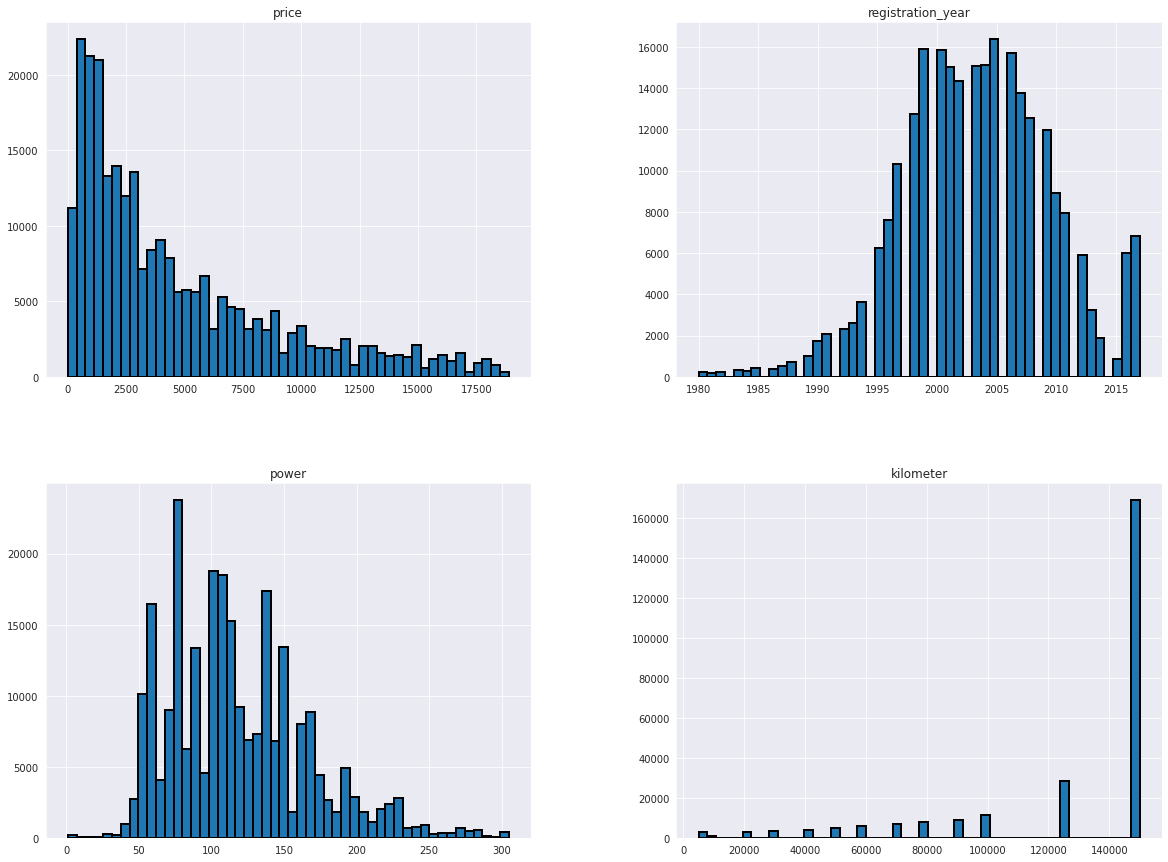

In [18]:
auto.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### Вывод

Подготовили данные для обучения. 

На этапе исследования были выявлены аномалии, дубликаты, пропуски.

- пропуски были заменены на `unknown`
- дубликаты удалены
- аномалии почищены

Мы выявили признаки, которые не несут полезной нагрузки для целей обучения: 

- `date_crawled` — дата скачивания анкеты из базы  
- `registration_month` — месяц регистрации автомобиля  
- `date_created` — дата создания анкеты  
- `number_of_pictures` — количество фотографий автомобиля  
- `postalcode` — почтовый индекс владельца анкеты (пользователя) 
- `last_seen` — дата последней активности пользователя  


Итоговый сет для работы - `auto`


обучение будет проивзодить с помощью библиотек: `Catboost`, `LightGBM` и воспользуемся ансамблем моделей из библиотеки `Sklearn`: `ElasticNet`, `SVR` и `LinearRegression`

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

## Обучение моделей

Сет разобьем на две составляющих - обучающий набор данных и тестовый набор, кросс-валидацию применять не будет для ускорения обучения. Посмотрим на результаты. Ohe применять не будем для обучения моделей библиотек Catboost, LightGBM, которые умеют работать с категориальными признаками, также попробуем сделать Ohe и стандартизацию при обучении моделей ансамбля, состоящего из SVR и LinearRegression, и отдельно попробуем ElasticNet  


Для оценки качества моделей будем применять метрику RMSE. Создадим списки для наполнения нашими результатми. После окончания тестов - создадим таблицу и проанализируем

In [19]:
rmse = []
training_time = []
prediction_time = []
model_name = []

### Подготовка выборок

Для удобства выведем нашу таблицу

In [20]:
auto.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
1,18300,coupe,2011,manual,190,unknown,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [21]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]


def print_info(data, x, x_val):
    return print(' Количество образцов обучающей выборки:', len(x),'\n',
                 'Количество образцов валидационной выборки:', len(x_val),'\n',
                 'Сумма выборок:', len(x) + len(x_val),'\n',
                 'Количество образцов подготовленной выборки (контрольная сумма):', len(data))

In [22]:
features, target = split_data(auto, 'price')
features.shape, target.shape

((257004, 9), (257004,))

Получили целевой признак и обучающие признаки. Можем разделить сет на обучабщий и тестовый:

In [23]:
X_train , X_test , y_train , y_test = train_test_split (
    features , target , test_size = .25 ,
    random_state = 42
)

print_info ( features , X_train , X_test )

 Количество образцов обучающей выборки: 192753 
 Количество образцов валидационной выборки: 64251 
 Сумма выборок: 257004 
 Количество образцов подготовленной выборки (контрольная сумма): 257004


<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### Catboost

Catboost умеет работать с категориальными переменными - в кодировании нет необходимости. Составим список наших категорий

In [24]:
cat_features = list(X_train.select_dtypes(include=['object']).columns)
cat_features

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [25]:
%%time
start_cat = time.time()

cat_model = CatBoostRegressor(iterations=100, learning_rate=0.25, 
                              verbose=20, cat_features=cat_features, random_seed=42)
cat_model.fit(X_train, y_train)
end_cat = time.time()
elapsed_cat = end_cat - start_cat

0:	learn: 3668.6719119	total: 159ms	remaining: 15.8s
20:	learn: 1742.9805879	total: 1.86s	remaining: 7s
40:	learn: 1646.2078744	total: 3.49s	remaining: 5.02s
60:	learn: 1605.8204040	total: 5.12s	remaining: 3.27s
80:	learn: 1581.3668434	total: 6.75s	remaining: 1.58s
99:	learn: 1564.8477817	total: 8.26s	remaining: 0us
CPU times: user 16 s, sys: 284 ms, total: 16.3 s
Wall time: 8.77 s


In [26]:
%%time
start_cp = time.time()

cat_pred = cat_model.predict(X_test)
cat_rmse = mean_squared_error(y_test, cat_pred) ** 0.5

end_cp = time.time()
elapsed_cp = end_cp - start_cp
print(f'RMSE модели на базе библиотеки Catboost {cat_rmse}')

RMSE модели на базе библиотеки Catboost 1611.4227649771296
CPU times: user 142 ms, sys: 7.07 ms, total: 149 ms
Wall time: 118 ms


In [27]:
rmse.append(cat_rmse)
training_time.append(elapsed_cat)
prediction_time.append(elapsed_cp)
model_name.append(cat_model.__class__.__name__)

Catboost показывает хороший результат по метрике, время обучения достаточно продолжительное. окончательные выводы сделаем после заверешения обучения всех моделей

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### LightGBM

LightGBM также умеет работать с категориальными переменными, нет необходимости применять кодирование, но нам необходимо привести категориальные признаки к типу category. Для соблюдения требований проверки скорости работы - преобразования также будем включать в замер

In [28]:
cat_features

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [29]:
gbm_features = list(X_train.columns)
gbm_features

['vehicle_type',
 'registration_year',
 'gearbox',
 'power',
 'model',
 'kilometer',
 'fuel_type',
 'brand',
 'not_repaired']

In [30]:
X_train_gbm = X_train.copy()

In [31]:
%%time
start_gbm = time.time()
for cat in cat_features:
    X_train_gbm[cat] = X_train_gbm[cat].astype('category')
X_train_gbm.info()  


# формирование сета данных для модели

train_data = lgb.Dataset ( X_train_gbm , label = y_train , feature_name = gbm_features ,
                           categorical_feature = cat_features
                           )
param = { 'learning_rate' : 0.25 , 'n_estimators' : 100 , 'objective' : 'root_mean_squared_error' }


# обучение модели

num_round = 1000
lgb_model = lgb.train(param, train_data, num_round)
end_gbm = time.time()
elapsed_gbm = end_gbm - start_gbm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192753 entries, 58690 to 146323
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   vehicle_type       192753 non-null  category
 1   registration_year  192753 non-null  int64   
 2   gearbox            192753 non-null  category
 3   power              192753 non-null  int64   
 4   model              192753 non-null  category
 5   kilometer          192753 non-null  int64   
 6   fuel_type          192753 non-null  category
 7   brand              192753 non-null  category
 8   not_repaired       192753 non-null  category
dtypes: category(6), int64(3)
memory usage: 7.2 MB
CPU times: user 2.63 s, sys: 42.6 ms, total: 2.68 s
Wall time: 1.54 s


In [32]:
X_test_gbm = X_test.copy()

In [33]:
%%time
start_gbmp = time.time()

for cat in cat_features:
    X_test_gbm[cat] = X_test_gbm[cat].astype('category')
X_test_gbm.info()


ypred = lgb_model.predict(X_test_gbm)
gbm_rmse = mean_squared_error(y_test, ypred) ** 0.5

end_gbmp = time.time()
elapsed_gbmp = end_gbmp - start_gbmp
print(f'RMSE модели на базе библиотеки LGBM {gbm_rmse}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64251 entries, 251496 to 4730
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   vehicle_type       64251 non-null  category
 1   registration_year  64251 non-null  int64   
 2   gearbox            64251 non-null  category
 3   power              64251 non-null  int64   
 4   model              64251 non-null  category
 5   kilometer          64251 non-null  int64   
 6   fuel_type          64251 non-null  category
 7   brand              64251 non-null  category
 8   not_repaired       64251 non-null  category
dtypes: category(6), int64(3)
memory usage: 2.4 MB
RMSE модели на базе библиотеки LGBM 1526.8832658251179
CPU times: user 604 ms, sys: 7.06 ms, total: 611 ms
Wall time: 354 ms


LightGBM показывает отличные результаты по метрике и времени обучения. 

In [34]:
rmse.append(gbm_rmse)
training_time.append(elapsed_gbm)
prediction_time.append(elapsed_gbmp)
model_name.append('LightGBM')

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

<a id='SVR'></a>

### Ансамбль SVR и LinearRegression


Попробуем также обучить ансамбль моделей на базе линейной регрессии и опорных векторов. Перед обучением данной модели необходимо провести OHE кодирование категориальных признаков, а также провести стандартизацию количественных

In [35]:
cat_features

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [36]:
num_features = list(set(X_train.columns) - set(cat_features))
num_features

['power', 'registration_year', 'kilometer']

In [37]:
numeric_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder ()
preprocessor = ColumnTransformer (
    transformers = [
        ('num' , numeric_transformer , num_features) ,
        ('cat' , categorical_transformer , cat_features) ]
    )

In [38]:
%%time
features_start = time.time()

X_train_reg = preprocessor.fit_transform(X_train)
X_test_reg  = preprocessor.transform(X_test)

features_end = time.time()
elap_feature = features_end - features_start

CPU times: user 495 ms, sys: 8.87 ms, total: 504 ms
Wall time: 508 ms


In [39]:
X_train_reg.shape, X_test_reg.shape

((192753, 9), (64251, 9))

In [40]:
pd.DataFrame(X_train_reg[:5], columns=['registration_year', 'kilometer', 'power',
                                      'vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 
                                       'not_repaired'])

,registration_year,kilometer,power,vehicle_type,gearbox,model,fuel_type,brand,not_repaired
0,-0.276317,0.410297,-0.761321,4.0,0.0,116.0,2.0,38.0,0.0
1,0.652607,-0.063987,0.595734,4.0,0.0,95.0,2.0,20.0,0.0
2,-0.276317,0.094107,0.595734,4.0,1.0,42.0,6.0,24.0,0.0
3,-0.627243,0.726487,0.595734,0.0,1.0,211.0,2.0,20.0,0.0
4,0.260395,-0.696367,0.595734,5.0,0.0,103.0,6.0,10.0,0.0


In [41]:
%%time
vot_start = time.time()

lin_reg = LinearRegression()

svr_reg = LinearSVR(epsilon=1.5, random_state=42)
voting_reg = VotingRegressor(
    estimators=[('lr', lin_reg), ('svr', svr_reg)])

voting_reg.fit(X_train_reg, y_train)

vot_end = time.time()
vot_elapsed = vot_end - vot_start + elap_feature

CPU times: user 13.5 s, sys: 139 ms, total: 13.6 s
Wall time: 13.5 s


In [42]:
%%time
start_votp = time.time()

vot_pred = voting_reg.predict(X_test_reg)
vot_rmse = mean_squared_error(y_test, vot_pred) ** 0.5

end_votp = time.time()
vot_el = end_votp - start_votp

print(f'RMSE модели на базе библиотеки Sklearn - ансамбль {vot_rmse}')

RMSE модели на базе библиотеки Sklearn - ансамбль 2770.0480103161635
CPU times: user 10.5 ms, sys: 10.9 ms, total: 21.5 ms
Wall time: 15.8 ms


Данная модель показывает результаты по метрике хуже, чем бустинговын модели

In [43]:
rmse.append(vot_rmse)
training_time.append(vot_elapsed)
prediction_time.append(vot_el)
model_name.append(voting_reg.__class__.__name__)

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### ElasticNet

Посмотрим как себя поведет Эластичная сеть. Признаки уже подгтовлены в пункте [2.4](#SVR). Учтем подготовку во времени работы этой модели

In [44]:
%%time
eln_start = time.time()

eln_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
eln_reg.fit(X_train_reg, y_train)

eln_end = time.time()
eln_elapsed = eln_end - eln_start + elap_feature

CPU times: user 182 ms, sys: 63 ms, total: 245 ms
Wall time: 139 ms


In [45]:
%%time

start_elnp = time.time()

eln_pred = eln_reg.predict(X_test_reg)
eln_rmse = mean_squared_error(y_test, eln_pred) ** 0.5

end_elnp = time.time()
eln_elap = end_elnp - start_elnp

print(f'RMSE модели на базе ElasticNet {eln_rmse}')

RMSE модели на базе ElasticNet 2740.0933785940288
CPU times: user 7.83 ms, sys: 28 µs, total: 7.86 ms
Wall time: 5.29 ms


Эластичная сеть показывает результат хуже, чем ансамбль моделей

In [46]:
rmse.append(eln_rmse)
training_time.append(eln_elapsed)
prediction_time.append(eln_elap)
model_name.append(eln_reg.__class__.__name__)

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

## Анализ моделей

Анализ моделей проведем по сводной таблице

In [47]:
summary = pd.DataFrame(
    { 'model' : model_name , 'training_time, sec' : training_time ,
      'prediction_time, sec' : prediction_time , 'rmse' : rmse }
    ).sort_values( by = 'rmse' ).reset_index( drop = True )
summary.style.highlight_min( 'rmse' , color = 'green' , axis = 0 ).highlight_min(
    'prediction_time, sec' ,
    color = 'lightblue' , axis = 0
    )


,model,"training_time, sec","prediction_time, sec",rmse
0,LightGBM,1.542483,0.352495,1526.883266
1,CatBoostRegressor,8.774599,0.117631,1611.422765
2,ElasticNet,0.646488,0.004315,2740.093379
3,VotingRegressor,13.993060,0.014681,2770.048010


Посмотрим на примере двух лучших моделей - LightGBM и Catboost важность признаков для обучения модели:

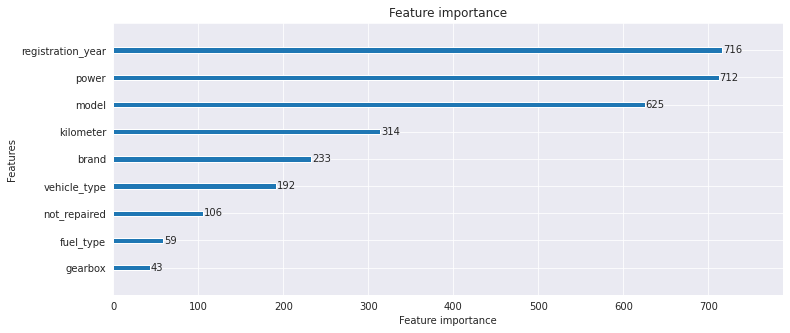

In [48]:
lgb.plot_importance(lgb_model, figsize = (12, 5))
plt.show()

У LightGBM самый важный признак - год регистрации автомобиля, можно попробовать провести ранжирование по годам и попробовать обучить еще раз, выделив возрастные группы, также важный признак - мощность двигателя автомобиля, что достаточно логично, третий по важности признак - модель автомобиля

Для визуализации важности признаков Catboost напишем функцию - встроенные методы позволят получить лишь вектор значений

In [49]:
def plot_feature_importance(importance,names,model_type):
    
  
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
     
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    

    plt.figure(figsize=(10,5))
    
    sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_names'], palette='Set2')
    
    plt.title(model_type +' ' + 'feature_importance')
    plt.xlabel('feature_importance')
    plt.ylabel('feature names')

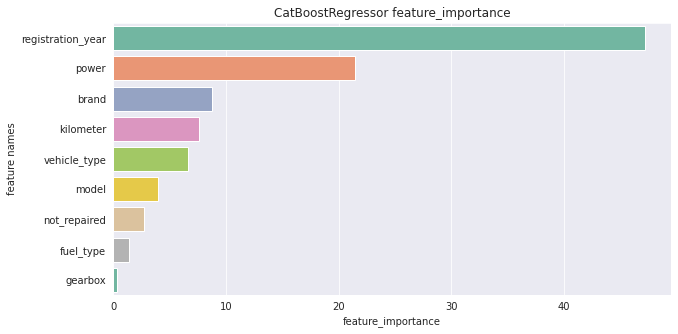

In [50]:
plot_feature_importance(cat_model.get_feature_importance(), 
                        X_train.columns, cat_model.__class__.__name__)

У Catboost аналогично LightGBM на 1 и 2 месте по важности - год регистрации и мощность двигателя, на третьем месте тип автомобиля, вместо модели.   


Можно попробовать проранжировать мощность двигателя автомобиля и год регистрации и обучить модель еще раз. Также удалив тип unknown

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### Light GBM с новыми признаками

Исключим из обучабщего и тестового набора данных строки со значением unknown (по сути, мы уберем Nan из данных не заменой, а удалением строк) [1.2 замена NaN](#nan)

In [51]:
nan_cols

['not_repaired', 'vehicle_type', 'fuel_type', 'gearbox', 'model']

для обучающего набора:

In [52]:
X_train_new = X_train[(X_train['not_repaired'] != 'unknown') & (X_train['vehicle_type'] != 'unknown')  & \
        (X_train['fuel_type'] != 'unknown') & (X_train['gearbox'] != 'unknown') & \
        (X_train['model'] != 'unknown')]
X_train_new.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
58690,sedan,2006,auto,105,golf,100000,gasoline,volkswagen,no
258463,sedan,2003,auto,150,e_klasse,150000,gasoline,mercedes_benz,no
258603,sedan,2004,manual,105,astra,150000,petrol,opel,no
297015,bus,2008,manual,88,sprinter,150000,gasoline,mercedes_benz,no
119154,small,1999,auto,131,focus,150000,petrol,ford,no


для тестового набора:

In [53]:
X_test_new = X_test[(X_test['not_repaired'] != 'unknown') & (X_test['vehicle_type'] != 'unknown')  & \
        (X_test['fuel_type'] != 'unknown') & (X_test['gearbox'] != 'unknown') & \
        (X_test['model'] != 'unknown')]
X_test_new.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
307728,small,1998,manual,75,polo,125000,petrol,volkswagen,no
7164,sedan,2002,manual,101,focus,150000,petrol,ford,no
219054,convertible,2008,manual,177,1er,80000,gasoline,bmw,no
198523,bus,2005,manual,101,combo,100000,gasoline,opel,no
248361,small,2004,manual,110,focus,150000,petrol,ford,no


In [54]:
X_train_new.shape, X_test_new.shape

((144383, 9), (48038, 9))

Также нам необходимо привести в порядок целевые сеты

In [55]:
y_train_new = y_train[y_train.index.isin(X_train_new.index)]
y_test_new = y_test[y_test.index.isin(X_test_new.index)]
y_train_new.shape, y_test_new.shape

((144383,), (48038,))

Теперь сделаем преобразование данных: нам необходимо добавить еще одну категорию - разделив автомобили по годам  и еще одну категорию - по мощности

In [56]:
pow_ser, pow_bin = pd.qcut(X_train_new['power'],5, retbins=True, labels=False)
year_ser, year_bin = pd.qcut(X_train_new['registration_year'], 7, retbins=True, labels=False)

In [57]:
X_train_new['pow_bin'] = pow_ser
X_train_new['year_bin'] = year_ser

In [58]:
X_train_new.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired,pow_bin,year_bin
58690,sedan,2006,auto,105,golf,100000,gasoline,volkswagen,no,2,4
258463,sedan,2003,auto,150,e_klasse,150000,gasoline,mercedes_benz,no,3,2
258603,sedan,2004,manual,105,astra,150000,petrol,opel,no,2,3
297015,bus,2008,manual,88,sprinter,150000,gasoline,mercedes_benz,no,1,5
119154,small,1999,auto,131,focus,150000,petrol,ford,no,3,1


In [59]:
class AttributAdder():
    """класс для добавления артибутов в виде ранга по году и мощности для LGBM.
 для признаков power и registration_year. Также преобразует категориальные признаки для LGBM"""
    
    def __init__(self, attr = True):
        self.attr = attr

    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        pow_ser, pow_bin = pd.qcut(X['power'],5, retbins=True, labels=False)
        year_ser, year_bin = pd.qcut(X['registration_year'], 7, retbins=True, labels=False)
        X['pow_bin'] = pow_ser
        X['year_bin'] = year_ser
        cat_features = list(X.select_dtypes(include=['object']).columns)
        for cat in cat_features:
            X[cat] = X[cat].astype('category')
        return X

In [60]:
AttributAdder.__doc__

'класс для добавления артибутов в виде ранга по году и мощности для LGBM.\n для признаков power и registration_year. Также преобразует категориальные признаки для LGBM'

In [61]:
attr_adder = AttributAdder(attr=True)
X_lgbm_train = attr_adder.transform(X_train_new)
X_lgbm_test = attr_adder.transform(X_test_new)

Проверим результат

In [62]:
X_lgbm_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired,pow_bin,year_bin
58690,sedan,2006,auto,105,golf,100000,gasoline,volkswagen,no,2,4
258463,sedan,2003,auto,150,e_klasse,150000,gasoline,mercedes_benz,no,3,2
258603,sedan,2004,manual,105,astra,150000,petrol,opel,no,2,3
297015,bus,2008,manual,88,sprinter,150000,gasoline,mercedes_benz,no,1,5
119154,small,1999,auto,131,focus,150000,petrol,ford,no,3,1


In [63]:
X_lgbm_train.dtypes

vehicle_type         category
registration_year       int64
gearbox              category
power                   int64
model                category
kilometer               int64
fuel_type            category
brand                category
not_repaired         category
pow_bin                 int64
year_bin                int64
dtype: object

Наш класс работает. Приступим к обучению модели

In [64]:
%%time
start_gbm_new = time.time()
cat_features_new = list(X_lgbm_train.select_dtypes(include=['object']).columns)
gbm_features_new = list(X_lgbm_train.columns)

train_data_new = lgb.Dataset ( X_lgbm_train , label = y_train_new , feature_name = gbm_features_new ,
                           categorical_feature = cat_features_new
                           )
param = { 'learning_rate' : 0.25 , 'n_estimators' : 100 , 'objective' : 'root_mean_squared_error' }


num_round = 1000
lgb_model_new = lgb.train(param, train_data_new, num_round)
end_gbm_new = time.time()
elapsed_gbm_new = end_gbm_new - start_gbm_new

CPU times: user 2.2 s, sys: 60.9 ms, total: 2.26 s
Wall time: 1.25 s


In [65]:
%%time
start_gbmp_new = time.time()

ypred_new = lgb_model_new.predict(X_lgbm_test)
gbm_rmse_new = mean_squared_error(y_test_new, ypred_new) ** 0.5

end_gbmp_new = time.time()
elapsed_gbmp_new = end_gbmp_new - start_gbmp_new
print(f'RMSE модели на базе библиотеки LGBM {gbm_rmse_new}')

RMSE модели на базе библиотеки LGBM 1512.5956321340996
CPU times: user 440 ms, sys: 1.92 ms, total: 442 ms
Wall time: 241 ms


In [66]:
rmse.append(gbm_rmse_new)
training_time.append(elapsed_gbm_new)
prediction_time.append(elapsed_gbmp_new)
model_name.append('LGBM (updated)')

In [67]:
summary_02 = pd.DataFrame(
    { 'model' : model_name , 'training_time, sec' : training_time ,
      'prediction_time, sec' : prediction_time , 'rmse' : rmse }
    ).sort_values( by = 'rmse' ).reset_index( drop = True )
summary_02.style.highlight_min( 'rmse' , color = 'green' , axis = 0 ).highlight_min(
    'prediction_time, sec' ,
    color = 'lightblue' , axis = 0
    )


,model,"training_time, sec","prediction_time, sec",rmse
0,LGBM (updated),1.250035,0.240439,1512.595632
1,LightGBM,1.542483,0.352495,1526.883266
2,CatBoostRegressor,8.774599,0.117631,1611.422765
3,ElasticNet,0.646488,0.004315,2740.093379
4,VotingRegressor,13.993060,0.014681,2770.048010


Немного потеряли в точности - стали хуже Catboost, но увеличили время предсказания. Возможно, эта **модель будет более оптимальной для заказчика**  - прирост во времени есть, и он может быть важнее, чем 20 единиц RMSE 

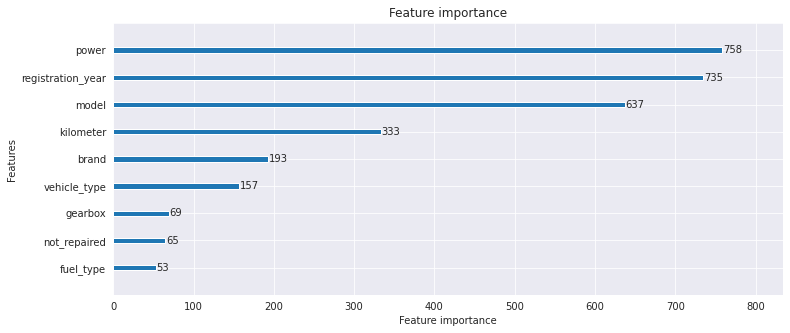

In [68]:
lgb.plot_importance(lgb_model_new, figsize = (12, 5))
plt.show()

Важность признаков не поменялась

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### Проверка на адекватность

Данные мы чистили, возьмем за основу среднее значение целевого признака

In [69]:
%%time
start_const = time.time()

pred_const = pd.Series(y_train.mean(), index=y_test.index)
rmse_const = mean_squared_error(y_test, pred_const) ** 0.5

end_const = time.time()
elapsed_const = end_const - start_const
print(f'RMSE модели на базе константсной модели {rmse_const}')

RMSE модели на базе константсной модели 4350.269639867979
CPU times: user 3.74 ms, sys: 4 µs, total: 3.75 ms
Wall time: 3.49 ms


In [70]:
rmse.append(rmse_const)
training_time.append(0.0)
prediction_time.append(elapsed_const)
model_name.append('Constant model (sanity check)')

In [71]:
summary_03 = pd.DataFrame(
    { 'model' : model_name , 'training_time, sec' : training_time ,
      'prediction_time, sec' : prediction_time , 'rmse' : rmse }
    ).sort_values( by = 'rmse' ).reset_index( drop = True )
summary_03.style.highlight_min( 'rmse' , color = 'green' , axis = 0 ).highlight_min(
    'prediction_time, sec' ,
    color = 'lightblue' , axis = 0
    )


,model,"training_time, sec","prediction_time, sec",rmse
0,LGBM (updated),1.250035,0.240439,1512.595632
1,LightGBM,1.542483,0.352495,1526.883266
2,CatBoostRegressor,8.774599,0.117631,1611.422765
3,ElasticNet,0.646488,0.004315,2740.093379
4,VotingRegressor,13.993060,0.014681,2770.048010
5,Constant model (sanity check),0.000000,0.003363,4350.269640


Константная модель обучается быстро, предсказывает быстро, но метрика в разы хуже наших моделей

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    

### Вывод

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.


Самое высокое качество показывает модель на основе LightGBM, время предсказания составляет 0.69 секунды
Самое быстрое время предсказания показывает модель на основе ElasticNet и VotingRegressor, но при этом у этих моделей страдает качество. Так же стоит отметить, что ElasticNet и обучается быстрее всех моделей. 

Так как **заказчику важна совокупность факторов - лучшая модель для поставленной цели будет основываться на библиотеке LightGBM**   


При этом, стоит отметить, что при выделении корзин по годам и мощности дают прирост в скорости предсказания - необходимо предложить использование в преобразовании деление на корзины

<a href='footer'>К содержанию</a>
<footer id='footer'></footer>    